# 量子生成对抗网络

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## 经典生成对抗网络

### 生成对抗网络简介

生成对抗网络（generative adversarial network, GAN）是生成模型的一种，是深度学习在近些年中一个重要的发展[1]。它分为两个部分：生成器 $G$（generator）和判别器 $D$ (discriminator)。生成器接受随机的噪声信号，以此为输入来生成我们期望得到的数据。判别器判断接收到的数据是不是来自真实数据，通常输出一个 $P(x)$，表示输入数据 $x$ 是真实数据的概率。

### 纳什均衡

在这里，我们用纳什均衡的思想来探讨 GAN 的收敛问题。

纳什均衡（Nash equilibrium）是指在包含两个或以上参与者的非合作博弈（non-cooperative game）中，假设每个参与者都知道其他参与者的均衡策略的情况下，没有参与者可以通过改变自身策略使自身受益时的一个概念解。在博弈论中，如果每个参与者都选择了自己的策略，并且没有玩家可以通过改变策略而其他参与者保持不变而获益，那么当前的策略选择的集合及其相应的结果构成了纳什均衡。

我们可以把GAN的训练过程视为生成器和判别器的博弈过程。在这个博弈过程中，无论生成器的策略是什么，判别器最好的策略就是尽量判别出真实数据和生成数据。而无论判别器的策略是什么，生成器最好的策略就是使判别器无法判别出来。我们不难发现，这种博弈是零和博弈（一种非合作博弈），即一方有所得则另一方必有所失。因此生成器和判别器的博弈存在这种纳什均衡策略。而当真实数据的样本足够多，双方的学习能力足够强时，最终就会达到一种纳什均衡点。**生成器具备了生成真实数据的能力，而判别器也无法再区分生成数据和真实数据。**

### 优化目标

在 GAN 中，我们重点想要得到的是一个优秀的生成器（但是只有优秀的判别器才能准确判断生成器是否优秀），所以我们训练的理想结果是判别器无法识别出数据是来自真实数据还是生成数据。

因此我们的目标函数如下：

$$
\min_{G}\max_{D} V(G,D)= \min_{G}\max_{D}\mathbb{E}_{x\sim P_{data}}[\log D(x)]+\mathbb{E}_{z\sim P_{z}}[\log(1-D(G(z)))]. \tag{1}
$$

这里，$G$ 表示生成器的参数，$D$ 表示判别器的参数。实际过程中，通常采用交替训练的方式，即先固定 $G$，训练 $D$，然后再固定 $D$，训练 $G$，不断往复。当两者的性能足够时，模型会收敛，两者达到纳什均衡。


### 优点

- 相对其他生成模型，GAN 的生成效果更好。
- 理论上，只要是可微分函数都可以用于构建生成器和判别器，因此能够与深度神经网络结合做深度生成模型。
- GAN 相对其他生成模型来说，不依赖先验假设，我们事先不需要假设数据的分布和规律。
- GAN 生成数据的形式也很简单，只需要通过生成器进行前向传播即可。

### 缺点

- GAN 无需预先建模，因此过于自由导致训练难以收敛而且不稳定。
- GAN 存在梯度消失问题，即很可能会达到这样一种状态，判别器的效果特别好，生成器的效果特别差。在这种情况下，判别器的训练没有任何损失，因此也没有有效的梯度信息去回传给生成器让它优化自己。
- GAN 的学习过程可能出现模式崩溃（model collapse）问题。生成器发生退化，总是生成同样的样本点，无法继续学习。而此时，判别器也会对相似的样本点指向相似的方向，模型参数已经不再更新，但是实际效果却很差。

## 量子生成对抗网络

量子生成对抗网络与经典的类似，只不过不再用于生成经典数据，而是生成量子态[2-3]。在实践中，如果我们有一个量子态，其在观测后会坍缩为某一本征态，无法恢复到之前的量子态。因此如果我们有一个方法可以根据已有的目标量子态生成出很多与之相同（或相近）的量子态，会很方便我们的实验。

假设我们已有的目标量子态是一个混合态，它们属于同一个系综，其密度算符为$\rho$。然后我们需要有一个生成器 $G$，它的输入是一个噪声数据，我们用一个系综 $\rho_{z}=\sum_{i}p_{i}|z_{i}\rangle\langle z_{i}|$ 来表示。因此我们每次取出一个随机噪声样本 $|z_{i}\rangle$，通过生成器后得到生成的量子态 $|x\rangle=G|z_{i}\rangle$，我们期望生成的 $|x\rangle$ 与目标量子态$\rho$相近。

值得注意的是，对于上文中提到的目标态的系综和噪声数据的系综，我们都认为有一个已有的物理设备可以生成出一个该系综下的量子态，而由于量子物理的相关性质，我们每次可以得到一个真正随机的量子态。但是在计算机程序中，我们仍然只能模拟这一过程。

对于判别器，我们期望判别器可以判断我们输入的量子态是已有的目标态还是生成的量子态，这一过程可以由测量给出。

## 一个简单的例子

### 问题描述

简单起见，我们假设已有的目标量子态是一个纯态，且生成器接受的输入为$|0\rangle$。

制备已有的目标量子态的线路：
![QGAN-fig-target_state](figures/QGAN-fig-target_state.png)

生成器的线路为：
![QGAN-fig-generator](figures/QGAN-fig-generator.png)

判别器的线路为：
![QGAN-fig-discriminator](figures/QGAN-fig-discriminator.png)

通过对判别器输出的量子态进行测量，我们可以得到将目标态判断为目标态的概率 $P_{T}$ 和将生成态判断为目标态的概率 $P_{G}$（通过对判别器连接目标态和生成器这两个不同的输入得到）。

### 具体过程

假设已有的目标量子态为 $|\psi\rangle$，生成器生成的量子态为 $|x\rangle=G|00\rangle$（生成器采用两量子比特线路，其中第0个量子比特认为是生成的量子态）。

判别器对数据进行判别并得到量子态$|\phi\rangle$，那么当输入为目标态时，$|\phi\rangle=D(|\psi\rangle\otimes |00\rangle)$；当输入为生成态时，$|\phi\rangle=D(G\otimes I)|000\rangle$。

对于判别器得到的量子态，我们还需要采用泡利 Z 门对第3个量子比特进行测量，从而得到判别器对输入量子态的判断结果（即判别器认为输入是目标态的概率）。首先有 $M_{z}=I\otimes I\otimes\sigma_{z}$，而测量结果为 $\text{disc}_\text{output}=\langle\phi|M_{z}|\phi\rangle$，所以测量结果为目标态的概率是 $P=(\text{disc}_\text{output}+1)/2$。

我们定义判别器的损失函数为 $\mathcal{L}_D=P_{G}(\text{gen}_\theta, \text{disc}_\phi)-P_{T}(\text{disc}_\phi)$，生成器的损失函数为 $\mathcal{L}_{G}=-P_{G}(\text{gen}_\theta, \text{disc}_\phi)$。这里的 $P_{G}$ 和 $P_{T}$ 分别是输入量子态为生成态和目标态时，$P=(\text{disc}_\text{output}+1)/2$ 的表达式，$\text{gen}_\theta$ 和 $\text{disc}_\phi$ 分别是生成器和判别器线路的参数。

因此我们只需要分别优化目标函数 $\min_{\text{disc}_\phi}\mathcal{L}_{D}$ 和 $\min_{\text{gen}_\theta}\mathcal{L}_{G}$ 即可交替训练判别器和生成器。

## 在 Paddle Quantum 上的实现

首先导入相关的包。

In [31]:
import numpy as np
import scipy
import warnings
import paddle
import paddle_quantum
from paddle_quantum.state import zero_state
from paddle_quantum.ansatz import Circuit
from paddle_quantum import Hamiltonian
from paddle_quantum.gate import *
from paddle_quantum.loss import ExpecVal
from paddle_quantum.qinfo import partial_trace
from tqdm import tqdm

warnings.filterwarnings("ignore")

然后定义我们的网络模型 QGAN。

In [32]:
# 设置模拟方式为密度矩阵
paddle_quantum.set_backend("density_matrix")

class QGAN:
    def __init__(self, target_state, LR, ITR, ITR_D, ITR_G):
        """
        输入参数
        target_state: 目标量子态
        LR:           学习率
        ITR:          总迭代次数
        ITR_D:        判别器迭代次数
        ITR_G:        生成器迭代次数
        """
        
        self.target_state = target_state.clone()

        # 生成器的量子电路
        self.generator = Circuit(3)
        self.generator.u3([0, 1])
        self.generator.cnot([0, 1])
        self.generator.u3(0)

        # 判别器的量子电路
        self.discriminator = Circuit(3)
        self.discriminator.u3([0, 2])
        self.discriminator.cnot([0, 2])
        self.discriminator.u3(0)
        
        # 训练参数
        self.LR = LR
        self.ITR = ITR
        self.ITR_D = ITR_D
        self.ITR_G = ITR_G

        # 优化器
        self.optimizer = paddle.optimizer.SGD(
            learning_rate=self.LR,
            parameters=self.generator.parameters() + self.discriminator.parameters(),
        )

    def disc_target_as_target(self):
        """
        判别器将目标态判断为目标态的概率
        """
        state = self.discriminator(self.target_state)
        expec_val_func = ExpecVal(Hamiltonian([[1.0, "z2"]]))

        # 判别器对目标态的判断结果
        target_disc_output = expec_val_func(state)
        prob_as_target = (target_disc_output + 1) / 2

        return prob_as_target

    def disc_gen_as_target(self):
        """
        判别器将生成态判断为目标态的概率
        """
        # 得到生成器生成的量子态
        gen_state = self.generator()

        # 判别器电路
        state = self.discriminator(gen_state)
        # 判别器对生成态的判断结果
        expec_val_func = ExpecVal(Hamiltonian([[1.0, "z2"]]))
        gen_disc_output = expec_val_func(state)
        prob_as_target = (gen_disc_output + 1) / 2

        return prob_as_target

    def gen_loss_func(self):
        """
        计算生成器的损失函数，loss值的区间为[-1, 0]，
        0表示生成效果极差，为-1表示生成效果极好
        """
        return -1 * self.disc_gen_as_target()

    def disc_loss_func(self):
        """
        计算判别器的损失函数，loss值的区间为[-1, 1]，
        为-1表示完美区分，为0表示无法区分，为1表示区分颠倒
        """
        return self.disc_gen_as_target() - self.disc_target_as_target()

    def get_target_state(self):
        """
        得到目标态的密度矩阵表示
        """
        state = partial_trace(self.target_state, 2, 4, 2)

        return state.numpy()

    def get_generated_state(self):
        """
        得到生成态的密度矩阵表示
        """
        state = self.generator()
        state = partial_trace(state, 2, 4, 2)

        return state.numpy()

    def train(self):
        """
        训练 QGAN 网络
        """
        
        # 用来记录 loss 值的变化
        loss_history = []
        pbar = tqdm(
            desc="Training: ",
            total=self.ITR * (self.ITR_G + self.ITR_D),
            ncols=100,
            ascii=True,
        )

        for _ in range(self.ITR):
            # 训练判别器
            loss_disc_history = []
            for _ in range(self.ITR_D):
                pbar.update(1)
                loss_disc = self.disc_loss_func()
                loss_disc.backward()
                self.optimizer.minimize(
                    loss_disc,
                    parameters=self.discriminator.parameters(),
                    no_grad_set=self.generator.parameters(),
                )
                self.optimizer.clear_grad()
                loss_disc_history.append(loss_disc.numpy()[0])

            # 训练生成器
            loss_gen_history = []
            for _ in range(self.ITR_G):
                pbar.update(1)
                loss_gen = self.gen_loss_func()
                loss_gen.backward()
                self.optimizer.minimize(
                    loss_gen,
                    parameters=self.generator.parameters(),
                    no_grad_set=self.discriminator.parameters(),
                )
                self.optimizer.clear_grad()
                loss_gen_history.append(loss_gen.numpy()[0])

            loss_history.append((loss_disc_history, loss_gen_history))

        pbar.close()

        return loss_history


接下来我们使用 PaddlePaddle 来训练我们的模型。

In [33]:
# 学习率
LR = 0.1
# 总的迭代次数
ITR = 25
# 每次迭代时，判别器的迭代次数
ITR1 = 40
# 每次迭代时，生成器的迭代次数
ITR2 = 50

# 制备目标量子态
target_state = zero_state(num_qubits=3)
target_state = RY(0, param=0.9 * np.pi)(target_state)
target_state = RZ(0, param=0.2 * np.pi)(target_state)

paddle.seed(18)

# 生成一个 QGAN 并进行训练
gan_demo = QGAN(target_state, LR, ITR, ITR1, ITR2)
loss_history = gan_demo.train()

# 得到目标量子态
target_state = gan_demo.get_target_state()

# 得到生成器最终生成的量子态
gen_state = gan_demo.get_generated_state()
print("the density matrix of the target state:")
print(target_state, "\n")
print("the density matrix of the generated state:")
print(gen_state, "\n")

# 计算两个量子态之间的距离，
# 这里的距离定义为 tr[(target_state-gen_state)^2]
distance = np.trace(np.matmul(target_state-gen_state, target_state-gen_state)).real
# 计算两个量子态的保真度
# fidelity = state_fidelity(target_state, gen_state)
fidelity = np.trace(
    scipy.linalg.sqrtm(scipy.linalg.sqrtm(target_state) @ gen_state @ scipy.linalg.sqrtm(gen_state))
).real
print("the distance between these two quantum states is", distance, "\n")
print("the fidelity between these two quantum states is", fidelity)

Training: 100%|#################################################| 2250/2250 [00:50<00:00, 44.19it/s]


the density matrix of the target state:
[[0.02447175+0.j         0.12500004-0.09081785j]
 [0.12500004+0.09081785j 0.97552836+0.j        ]] 

the density matrix of the generated state:
[[0.02444273-1.0244548e-08j 0.12302139-9.3332976e-02j]
 [0.12302142+9.3332976e-02j 0.9755573 +0.0000000e+00j]] 

the distance between these two quantum states is 2.0483465e-05 

the fidelity between these two quantum states is 0.9999945609564611


我们通过比较目标量子态和生成量子态的密度矩阵 $\rho_\text{target}$ 和 $\rho_\text{gen}$ 以及计算它们之间的距离 $\text{tr}[(\rho_\text{target}-\rho_\text{gen})^2]$ 和保真度可以得知，我们的生成器生成了一个与目标态很相近的量子态。

## 训练过程的可视化

接下来我们观察一下，在训练过程中，判别器和生成器的 loss 曲线变化过程。

首先安装所需要的 package。

In [34]:
from IPython.display import clear_output
%pip install celluloid
clear_output()

接下来，我们绘制 loss 曲线的变化。

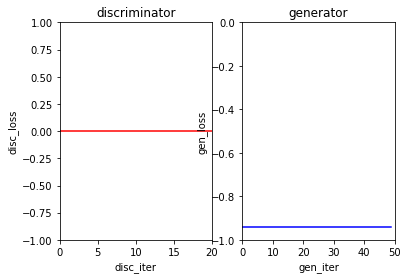

In [35]:
import matplotlib.pyplot as plt
from celluloid import Camera
def draw_pic(loss_history):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    camera = Camera(fig)
    axes[0].set_title("discriminator")
    axes[0].set_xlabel("disc_iter")
    axes[0].set_ylabel("disc_loss")
    axes[0].set_xlim(0, 20)
    axes[0].set_ylim(-1, 1)
    axes[1].set_title("generator")
    axes[1].set_xlabel("gen_iter")
    axes[1].set_ylabel("gen_loss")
    axes[1].set_xlim(0, 50)
    axes[1].set_ylim(-1, 0)
    for loss in loss_history:
        disc_data, gen_data = loss
        disc_x_data = range(len(disc_data))
        gen_x_data = range(len(gen_data))
        axes[0].plot(disc_x_data, disc_data, color='red')
        axes[1].plot(gen_x_data, gen_data, color='blue')
        camera.snap()
    animation = camera.animate(interval=600, 
                               repeat=True, repeat_delay=800)
    animation.save("./figures/QGAN-fig-loss.gif")
draw_pic(loss_history)
clear_output()

![QGAN-fig-loss](figures/QGAN-fig-loss.gif)

在这个动态图片中，每个帧代表一次迭代的过程。在一次迭代中，左边的红线表示判别器的 loss 曲线，右边的蓝线表示生成器的 loss 曲线。可以看出，在初始的时候，判别器和生成器每次都能从一个比较差的判别能力和生成能力逐渐学习到当前情况下比较好的判别能力和生成能力。随着学习的进行，生成器的生成能力越来越强，判别器的能力也越来越强，但是却也无法判别出真实数据和生成数据，因为这种时候生成器已经生成出了接近真实数据的生成数据，此时模型已经收敛。

_______

## 参考文献

[1] Goodfellow, I. J. et al. Generative Adversarial Nets. [Proc. 27th Int. Conf. Neural Inf. Process. Syst. (2014).](https://papers.nips.cc/paper/5423-generative-adversarial-nets)

[2] Lloyd, S. & Weedbrook, C. Quantum Generative Adversarial Learning. [Phys. Rev. Lett. 121, 040502 (2018).](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502)

[3] Benedetti, M., Grant, E., Wossnig, L. & Severini, S. Adversarial quantum circuit learning for pure state approximation. [New J. Phys. 21, (2019).](https://iopscience.iop.org/article/10.1088/1367-2630/ab14b5)